In [11]:
import pandas as pd
from io import StringIO
csv_data = StringIO("""
x1,x2,x3,x4,x5
1,0.1,"1",2019-01-01,A
2,,,2019-01-02,B
3,,"3",2019-01-03,C
,0.4,"4",2019-01-04,A
5,0.5,"5",2019-01-05,B
,,,2019-01-06,C
7,0.7,"7",,A
8,0.8,"8",2019-01-08,B
9,0.9,,2019-01-09,C
""")
df = pd.read_csv(csv_data, dtype={"x1": pd.Int64Dtype()}, parse_dates=[3])
df

,x1,x2,x3,x4,x5
0,1,0.1,1.0,2019-01-01,A
1,2,NaN,NaN,2019-01-02,B
2,3,NaN,3.0,2019-01-03,C
3,<NA>,0.4,4.0,2019-01-04,A
4,5,0.5,5.0,2019-01-05,B
5,<NA>,NaN,NaN,2019-01-06,C
6,7,0.7,7.0,NaT,A
7,8,0.8,8.0,2019-01-08,B
8,9,0.9,NaN,2019-01-09,C


In [12]:
df.isnull()

,x1,x2,x3,x4,x5
0,False,False,False,False,False
1,False,True,True,False,False
2,False,True,False,False,False
3,True,False,False,False,False
4,False,False,False,False,False
5,True,True,True,False,False
6,False,False,False,True,False
7,False,False,False,False,False
8,False,False,True,False,False


In [13]:
df.isnull().sum()

x1    2
x2    3
x3    3
x4    1
x5    0
dtype: int64

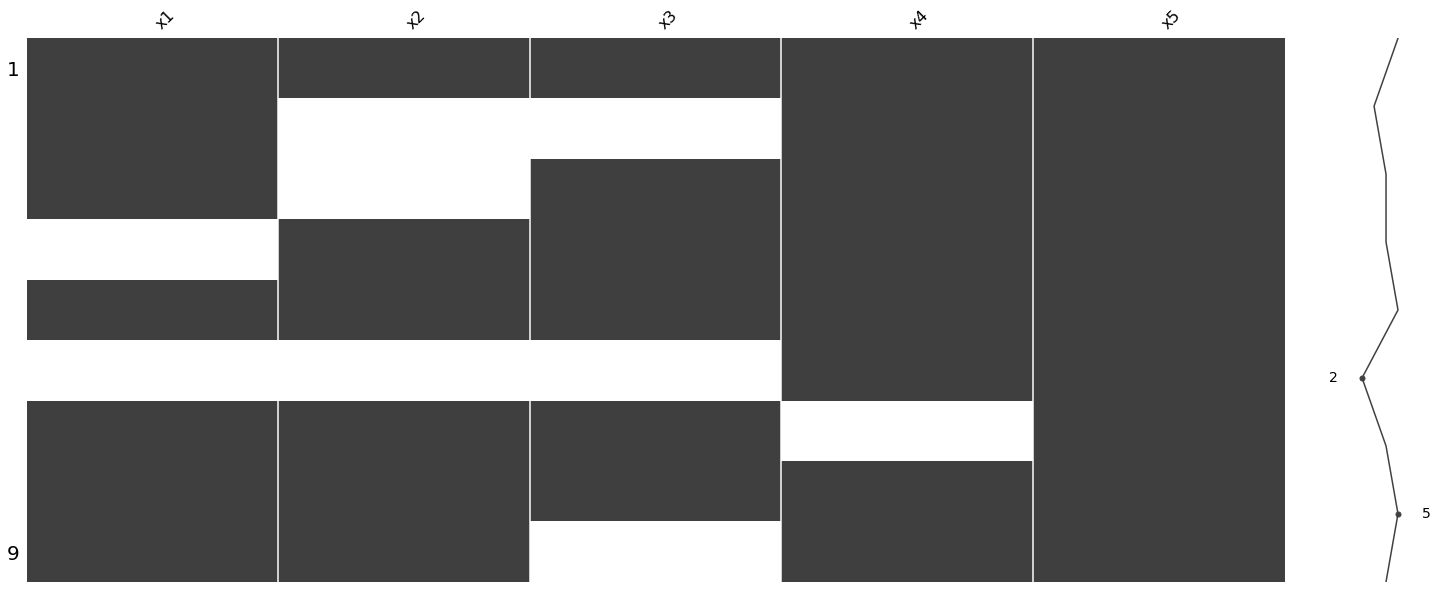

In [15]:
import missingno as msno
import matplotlib.pylab as plt
#matrix() 함수는 결측 데이터를 시각화하는 명령이다
#결측된 데이터는 흰색, 그렇지않은 데이터는 검은색
#가장오른쪽에있는것은 스파크라인 각행의데이터완성도표현
msno.matrix(df)
plt.show()


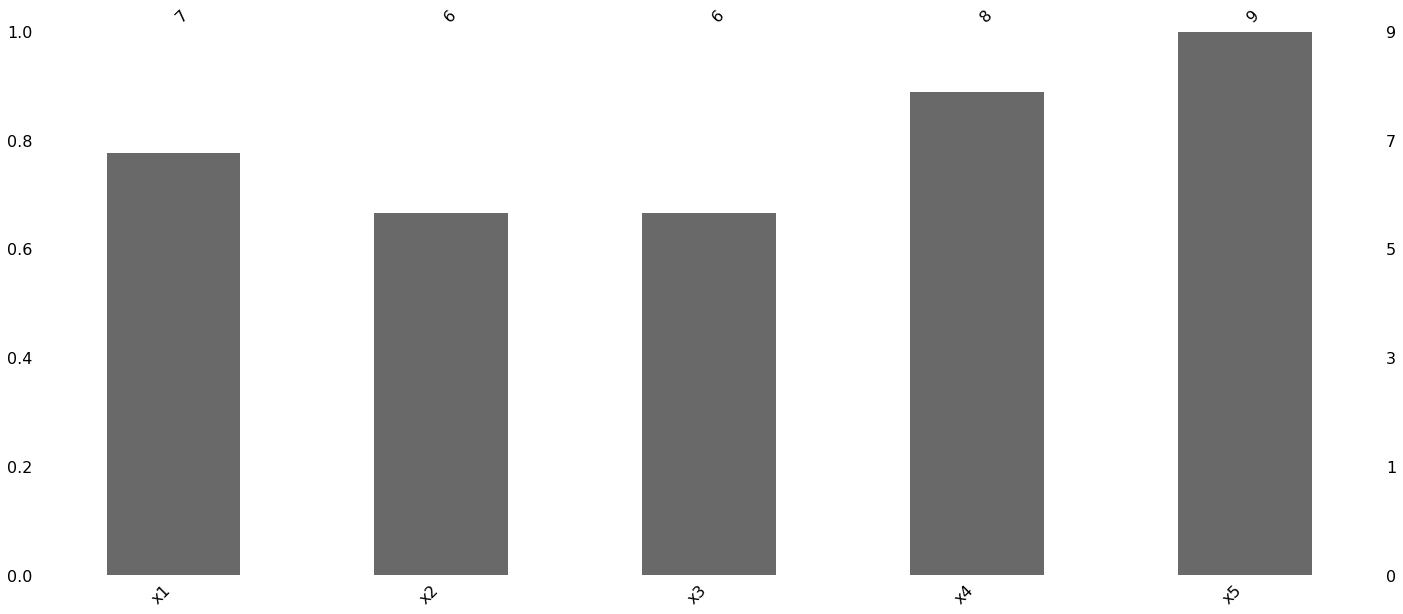

In [16]:
#각열에 결측데이터가 얼마나있는지 시각화 -> bar()
msno.bar(df)
plt.show()

In [17]:
import seaborn as sns
#타이타닉생존자데이터는 seaborn패키지에서 제공하는 예제데이터이다
titanic = sns.load_dataset("titanic")
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


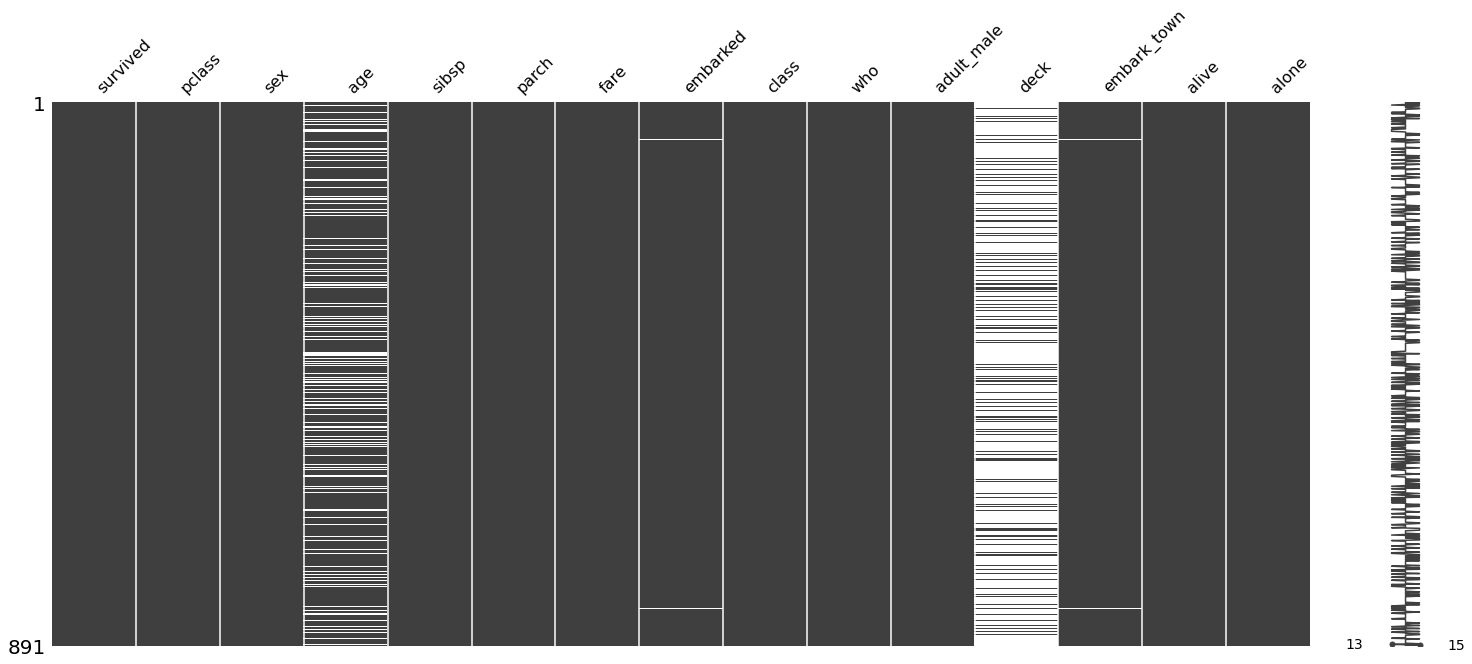

In [18]:
#missingno를 이용 age, deck, embarkd, embark_town 열 등에 결측 데이터 존재
msno.matrix(titanic)
plt.show()

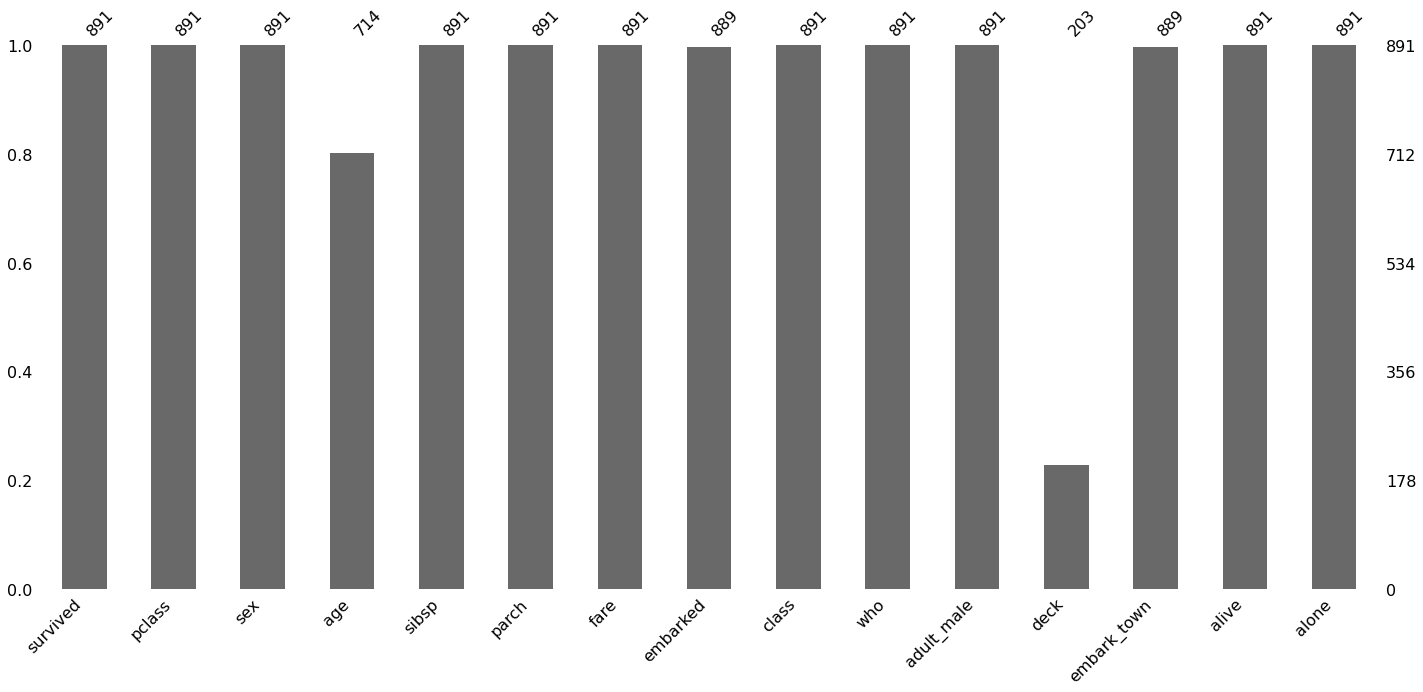

In [19]:
msno.bar(titanic)
plt.show()

In [20]:
#결측데이터 처리방법
#1.결측데이터가 너무많은경우 해당데이터 열전체삭제
#2.일부인경우 가장그럴듯한값으로 대체 -> 결측데이터 대체
#dropna() 결측데이터가존재하는행이나 열을지울수있다

#존재하는모든행을지운다
df.dropna()

,x1,x2,x3,x4,x5
0,1,0.1,1.0,2019-01-01,A
4,5,0.5,5.0,2019-01-05,B
7,8,0.8,8.0,2019-01-08,B


In [21]:
#axis 인수를 1로 설정하면 결측 데이터가 있는 열을 제거한다
df.dropna(axis=1)

,x5
0,A
1,B
2,C
3,A
4,B
5,C
6,A
7,B
8,C


In [22]:
#thresh : 특정 갯수 이상의 비결측 데이터가 있는 행 또는 열만 남긴다
df.dropna(thresh=7,axis=1)

,x1,x4,x5
0,1,2019-01-01,A
1,2,2019-01-02,B
2,3,2019-01-03,C
3,<NA>,2019-01-04,A
4,5,2019-01-05,B
5,<NA>,2019-01-06,C
6,7,NaT,A
7,8,2019-01-08,B
8,9,2019-01-09,C


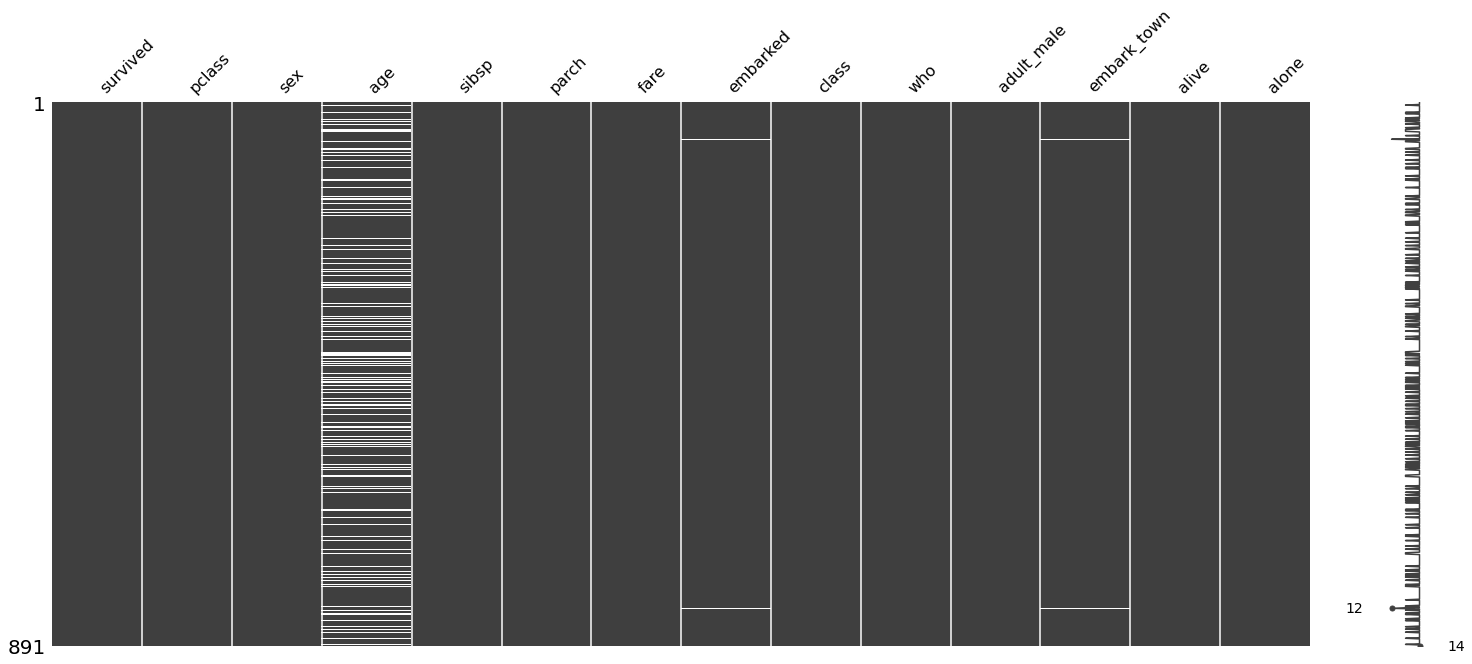

In [23]:
#deck 데이터는 결측된 데이터가 
#너무 많기 때문에 이 방법으로 데이터를 삭제한다
# 데이터가 절반 이상이 없는 열을 삭제
titanic = titanic.dropna(thresh=int(len(titanic) * 0.5), axis=1)
msno.matrix(titanic)
plt.show()

In [33]:
#pip install sklearn
import sklearn as sk
import numpy as np

In [36]:
#해당 열의 비결측 데이터의 평균값 혹은 중앙값 등을
#대체값으로 사용하여 결측된 데이터를 채운다.
#SimpleImputer :"mean" - 평균값 /"median" - 중앙값 /"most_frequent"-최빈값
#fit_transform : 대체값이 채워신 데이터프레임을 생성
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="most_frequent")
#df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
#df
imputer.fit_transform(df)

TypeError: cannot astype a datetimelike from [datetime64[ns]] to [float64]

In [37]:
titanic =sns.load_dataset("titanic")
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [38]:
from patsy import dmatrix

In [39]:
dmatrix("survived + pclass + age +0",titanic)

DesignMatrix with shape (714, 3)
  survived  pclass  age
         0       3   22
         1       1   38
         1       3   26
         1       1   35
         0       3   35
         0       1   54
         0       3    2
         1       3   27
         1       2   14
         1       3    4
         1       1   58
         0       3   20
         0       3   39
         0       3   14
         1       2   55
         0       3    2
         0       3   31
         0       2   35
         1       2   34
         1       3   15
         1       1   28
         0       3    8
         1       3   38
         0       1   19
         0       1   40
         0       2   66
         0       1   28
         0       1   42
         0       3   21
         0       3   18
  [684 rows omitted]
  Terms:
    'survived' (column 0)
    'pclass' (column 1)
    'age' (column 2)
  (to view full data, use np.asarray(this_obj))

In [40]:
dmatrix("x1 + np.log(np.abs(x2))",df)

TypeError: Cannot interpret 'Int64Dtype()' as a data type

C:\Users\wldms\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\wldms\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45936 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\wldms\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\wldms\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\wldms\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_tex

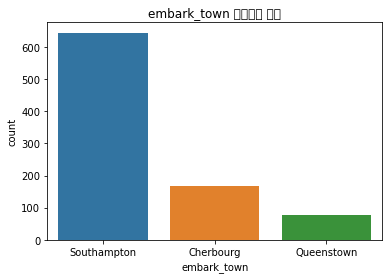

In [41]:
sns.countplot(titanic.embark_town)
plt.title("embark_town 데이터의 분포")
plt.show()

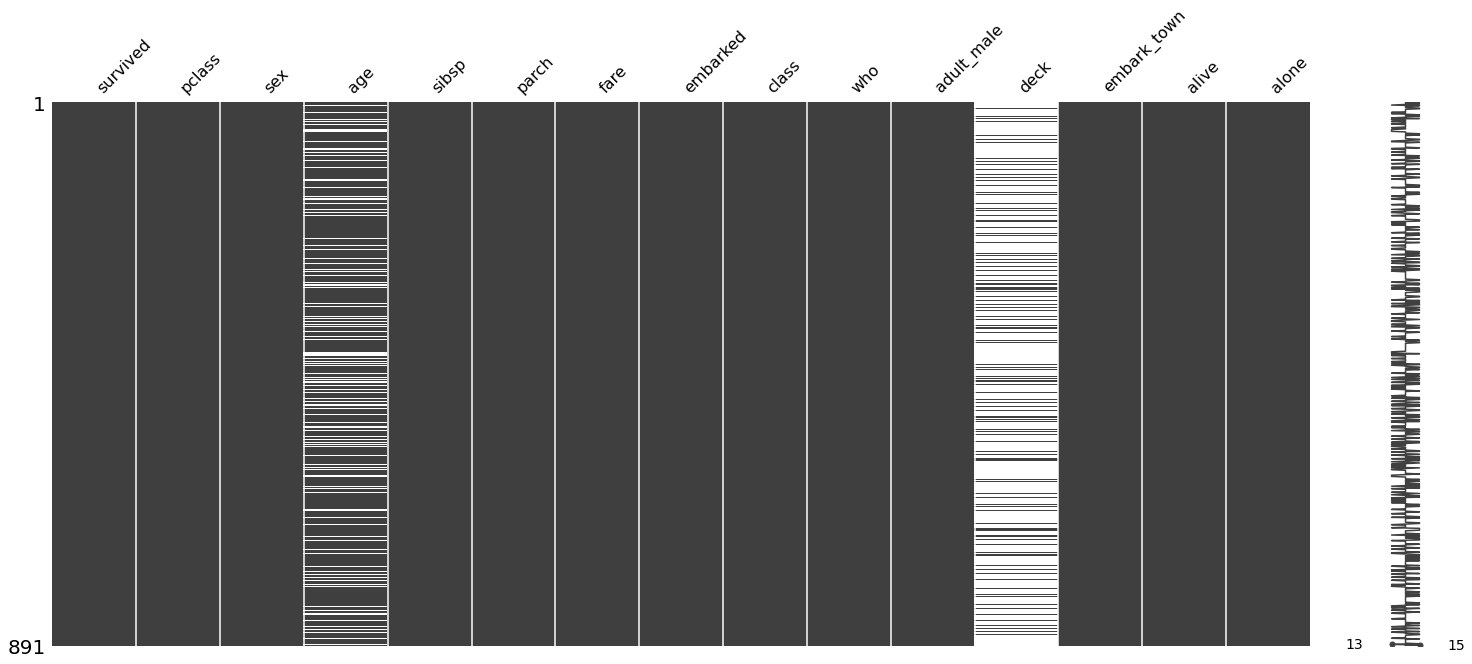

In [42]:
from sklearn.impute import SimpleImputer

imputer_embark_town=SimpleImputer(strategy="most_frequent")
titanic["embark_town"]=imputer_embark_town.fit_transform(titanic[["embark_town"]])
titanic["embarked"]=imputer_embark_town.fit_transform(titanic[["embarked"]])
msno.matrix(titanic)
plt.show()

C:\Users\wldms\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45936 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\wldms\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\wldms\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\wldms\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\wldms\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\wldms\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54252 missing from c

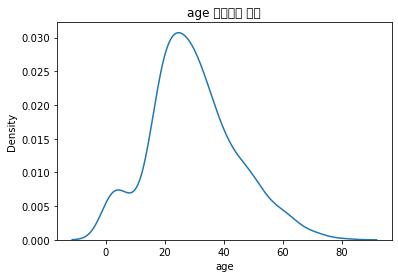

In [43]:
# seaborn의 경우 kdeplot 기능을 사용하여 밀도 플롯
sns.kdeplot(titanic.age)
plt.title("age 데이터의 분포")
plt.show()

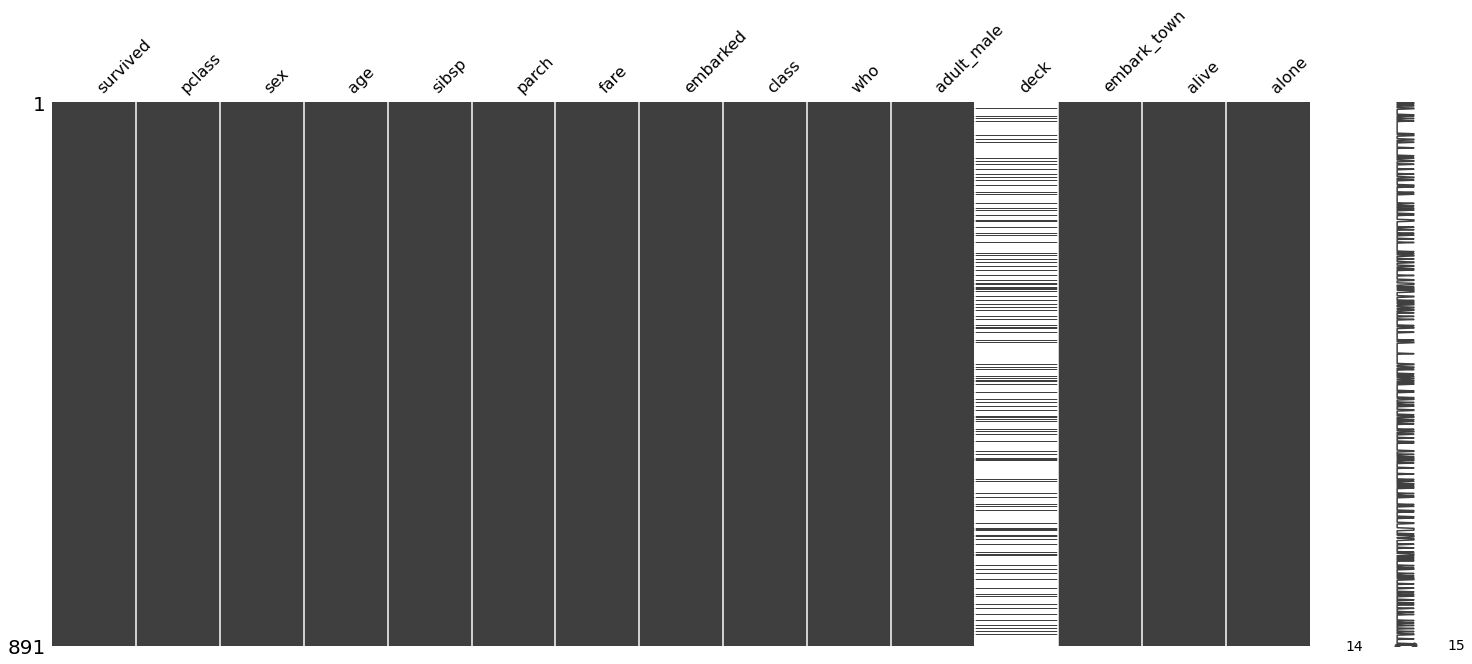

In [45]:
imputer_age=SimpleImputer(strategy="median")
titanic["age"]=imputer_embark_town.fit_transform(titanic[["age"]])
msno.matrix(titanic)
plt.show()

patsy패키지

In [46]:
#데이터프레임에서 원하는데이터만 선택하거나 새로운데이터를 조합생성
#demo_data() : x로시작하는 변수에 대해 임의의 실수데이터 생성

In [49]:
from patsy import demo_data
df=pd.DataFrame(demo_data("x1","x2","x3","x4","x5"))
df

,x1,x2,x3,x4,x5
0,1.764052,-0.977278,0.144044,0.333674,-2.552990
1,0.400157,0.950088,1.454274,1.494079,0.653619
2,0.978738,-0.151357,0.761038,-0.205158,0.864436
3,2.240893,-0.103219,0.121675,0.313068,-0.742165
4,1.867558,0.410599,0.443863,-0.854096,2.269755


In [52]:
#dmatrx() : 상수항을 추가하거나 원하는 데이터만 선택하거나 변형
#모형 정의 문자열 formula , 원 데이터를 담은 데이터프레임 data
#formula 에서 지정한 대로 변환된 데이터 data_transformed를 출력
from patsy import dmatrix

#data_transformed=dmatrix(formula,data)
#예를들어 전체데이터중 x1만 뽑고싶으면 x1+0입력
dmatrix("x1+0",data=df)

DesignMatrix with shape (5, 1)
       x1
  1.76405
  0.40016
  0.97874
  2.24089
  1.86756
  Terms:
    'x1' (column 0)

In [54]:
#+ 0 은 1로 구성된 상수항을 넣지 말라는 뜻이다
#전체데이터중 x1,x2,x3 뽑고싶으면 
dmatrix("x1+x2+x3+0",data=df)

DesignMatrix with shape (5, 3)
       x1        x2       x3
  1.76405  -0.97728  0.14404
  0.40016   0.95009  1.45427
  0.97874  -0.15136  0.76104
  2.24089  -0.10322  0.12168
  1.86756   0.41060  0.44386
  Terms:
    'x1' (column 0)
    'x2' (column 1)
    'x3' (column 2)

In [55]:
#patsy는 자동으로 가장 앞에 Intercept란 이름의 상수항 데이터를 추가
dmatrix("x1+x2+x3",data=df)

DesignMatrix with shape (5, 4)
  Intercept       x1        x2       x3
          1  1.76405  -0.97728  0.14404
          1  0.40016   0.95009  1.45427
          1  0.97874  -0.15136  0.76104
          1  2.24089  -0.10322  0.12168
          1  1.86756   0.41060  0.44386
  Terms:
    'Intercept' (column 0)
    'x1' (column 1)
    'x2' (column 2)
    'x3' (column 3)

In [56]:
#- 1 도 + 0 과 같은 뜻이다
dmatrix("x1+x2+x3+0",data=df)

DesignMatrix with shape (5, 3)
       x1        x2       x3
  1.76405  -0.97728  0.14404
  0.40016   0.95009  1.45427
  0.97874  -0.15136  0.76104
  2.24089  -0.10322  0.12168
  1.86756   0.41060  0.44386
  Terms:
    'x1' (column 0)
    'x2' (column 1)
    'x3' (column 2)

In [57]:
#변수를 어떤 함수에 넣어서 다른 갑으로 만드는 수학 변환(transform)도 가능
dmatrix("x1 + np.log(np.abs(x2))", df)

DesignMatrix with shape (5, 3)
  Intercept       x1  np.log(np.abs(x2))
          1  1.76405            -0.02298
          1  0.40016            -0.05120
          1  0.97874            -1.88811
          1  2.24089            -2.27090
          1  1.86756            -0.89014
  Terms:
    'Intercept' (column 0)
    'x1' (column 1)
    'np.log(np.abs(x2))' (column 2)

In [58]:
#numpy뿐아니라 사용자정의함수도사용가능
def ten_times(x):
    return 10 * x
dmatrix("ten_times(x1)",df)

DesignMatrix with shape (5, 2)
  Intercept  ten_times(x1)
          1       17.64052
          1        4.00157
          1        9.78738
          1       22.40893
          1       18.67558
  Terms:
    'Intercept' (column 0)
    'ten_times(x1)' (column 1)

In [59]:
#기존의 데이터를 조합 연산하여 새로운 데이터를 만드는 것도 가능
#두 변수를 곱해서 만들어지는 새로운 변수를 상호작용(interaction) -> :
dmatrix("x1 + x2 + x1:x2 + 0", df)

DesignMatrix with shape (5, 3)
       x1        x2     x1:x2
  1.76405  -0.97728  -1.72397
  0.40016   0.95009   0.38018
  0.97874  -0.15136  -0.14814
  2.24089  -0.10322  -0.23130
  1.86756   0.41060   0.76682
  Terms:
    'x1' (column 0)
    'x2' (column 1)
    'x1:x2' (column 2)

In [60]:
dmatrix("x1 * x2 + 0", df)

DesignMatrix with shape (5, 3)
       x1        x2     x1:x2
  1.76405  -0.97728  -1.72397
  0.40016   0.95009   0.38018
  0.97874  -0.15136  -0.14814
  2.24089  -0.10322  -0.23130
  1.86756   0.41060   0.76682
  Terms:
    'x1' (column 0)
    'x2' (column 1)
    'x1:x2' (column 2)

In [61]:
#연산과정명시 -> I()
dmatrix("x1 + x2 + I(x1 + x2) + 0", df)

DesignMatrix with shape (5, 3)
       x1        x2  I(x1 + x2)
  1.76405  -0.97728     0.78677
  0.40016   0.95009     1.35025
  0.97874  -0.15136     0.82738
  2.24089  -0.10322     2.13767
  1.86756   0.41060     2.27816
  Terms:
    'x1' (column 0)
    'x2' (column 1)
    'I(x1 + x2)' (column 2)

#선형회귀분석

#스케일링(scaling)  : 조건수(condition number)의 영향으로 데이터의 평균 0으로 표준편차 1로 만드는 작업

center() : 평균을 0으로 스케일링

standardize() : 평균을 0으로하고 표준편차를 1로 스케일링

scale() : standardize() 과 같음

In [62]:
dm = dmatrix("center(x1) + 0", df)
dm

DesignMatrix with shape (5, 1)
  center(x1)
     0.31377
    -1.05012
    -0.47154
     0.79061
     0.41728
  Terms:
    'center(x1)' (column 0)

In [63]:
#위 변환 연산은 다음과 같이 x1 데이터에서 x1의 평균을 빼는 것과 같다.
df.x1 - np.mean(df.x1)

0    0.313773
1   -1.050123
2   -0.471542
3    0.790613
4    0.417278
Name: x1, dtype: float64

In [64]:
#이 때 평균값은 design_info 라는 속성 내부에 저장
dm.design_info.factor_infos

{EvalFactor('center(x1)'): FactorInfo(factor=EvalFactor('center(x1)'),
            type='numerical',
            state=<factor state>,
            num_columns=1)}

#sklearn.preprocessing

1. 학습용 데이터를 입력으로 fit() 메서드를 실행하면 평균값과 표준편차를 계산하여 객체내에 저장한다.

2. 다시 학습용 데이터를 입력으로 하여 transform() 메서드를 실행하면 저장했던 평균값을 빼서 새로운 평균값이 0이 되도록 만들고, 저장한 표분편차로 나우어 새로운 표준편차가 1이 되도록 데이터를 변환하여 출력
1단계와 2단계를 합쳐서 fit_transform() 메서드를 실행할 수도 있다.

3. 검증용 데이터를 입력으로 하여 transform() 메서드를 실행해도 학습용 데이터의 평균값과 표준편차를 사용하여 검증용 데이터를 변환한다.

In [65]:
X=np.arange(7).reshape(-1,1)
X

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6]])

In [66]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X)

array([[-1.5],
       [-1. ],
       [-0.5],
       [ 0. ],
       [ 0.5],
       [ 1. ],
       [ 1.5]])

In [67]:
#다른 데이터와 동떨어진 아웃라이어가 존재하는 경우
#스케일링을 했을 때 데이터가 0이 아닌 다른 곳으로 모일 수 있다
X2 = np.vstack([X, [[1000]]])
X2

array([[   0],
       [   1],
       [   2],
       [   3],
       [   4],
       [   5],
       [   6],
       [1000]])

In [68]:
scaler.fit_transform(X2)

array([[-0.38705669],
       [-0.38402392],
       [-0.38099115],
       [-0.37795839],
       [-0.37492562],
       [-0.37189286],
       [-0.36886009],
       [ 2.64570872]])

In [69]:
#RobustScaler :중앙값이 0, IQR(interquartile range)이 1 반환
#아웃라이어가 섞여도 대부분데이터는 0주위에남음
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler.fit_transform(X2)

array([[-1.00000000e+00],
       [-7.14285714e-01],
       [-4.28571429e-01],
       [-1.42857143e-01],
       [ 1.42857143e-01],
       [ 4.28571429e-01],
       [ 7.14285714e-01],
       [ 2.84714286e+02]])

In [70]:
#PolynomialFeatures : 입력데이터x를 여러개의 다항식으로변환
#degree - 차수 / include_bias : 상수항 생성여부
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
poly.fit_transform(X)

array([[ 1.,  0.,  0.],
       [ 1.,  1.,  1.],
       [ 1.,  2.,  4.],
       [ 1.,  3.,  9.],
       [ 1.,  4., 16.],
       [ 1.,  5., 25.],
       [ 1.,  6., 36.]])

In [71]:
X = 90 * np.arange(9).reshape(-1, 1)
X

array([[  0],
       [ 90],
       [180],
       [270],
       [360],
       [450],
       [540],
       [630],
       [720]])